In [2]:
# Vamos rodar gráficos estáticos, usar o estilo "seaborn-whitegrid" 
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.ticker as ticker
import pandas as pd
from numpy import *
%matplotlib inline
#plt.style.use('seaborn-whitegrid')
#plt.style.use('classic')

In [3]:
# Entrando nas pastas:
pasta='/media/andre/SAMSUNG/00_Mestrado/Resultados_3/Saidas/Desmatamento/Seca/09-Setembro/16UTC'
#pasta='/home/andre/Desktop/Resultados_2/Saidas/Desmatamento/Seca/09-Setembro/16UTC'
data=sorted(glob.glob(pasta+'/*final.csv'))
cols=['sat','wavelenght','site','season','year','julian','hhmmss','sza','vza','ref063','ref390','temp','reff','phase','tcw','thi']

In [4]:
data

['/media/andre/SAMSUNG/00_Mestrado/Resultados_3/Saidas/Desmatamento/Seca/09-Setembro/16UTC/analysis-reffready-final.csv']

In [5]:
np.squeeze?

In [6]:
# Arrumando os dados:
for file in data:
    dados = pd.read_csv(file, skiprows=1, sep=",", names=cols, na_values=["-9999"])
    good=(dados.temp>0)&(dados.reff>0)&(dados.ref063>0)&(dados.ref390>0)&(dados.reff<200)&(dados.sza<60)&(dados.vza<60)
    celsius = (dados.temp[good])-273.15
    reff_v = dados.reff[good] 
    r063 = dados.ref063[good]*100
    r390 = dados.ref390[good]*100
    SZA = dados.sza[good]
    VZA = dados.vza[good]
    mu0 = np.cos(SZA)

In [7]:
celsius.describe()

count    14387.000000
mean       -34.178490
std         17.592748
min        -78.626000
25%        -47.350000
50%        -32.181000
75%        -21.390000
max         16.268000
Name: temp, dtype: float64

In [8]:
reff_v.describe()

count    14387.000000
mean         4.901693
std          2.782765
min          0.000259
25%          2.734236
50%          4.923579
75%          6.790336
max         48.576176
Name: reff, dtype: float64

In [9]:
r063.describe()

count    14387.000000
mean        61.800308
std         20.545567
min         20.523000
25%         45.799000
50%         61.805000
75%         78.401000
max        137.120000
Name: ref063, dtype: float64

In [10]:
r390.describe()

count    14387.000000
mean        15.774717
std          8.728432
min          1.662430
25%          9.588190
50%         12.796500
75%         18.942700
max         42.306700
Name: ref390, dtype: float64

In [11]:
SZA.describe()

count    14387.000000
mean        17.341751
std          4.021345
min          8.704820
25%         12.285600
50%         19.384600
75%         20.229350
max         24.090200
Name: sza, dtype: float64

In [12]:
mu0.describe()

count    14387.000000
mean         0.241276
std          0.654001
min         -1.000000
25%         -0.303233
50%          0.422455
75%          0.830428
max          1.000000
Name: sza, dtype: float64

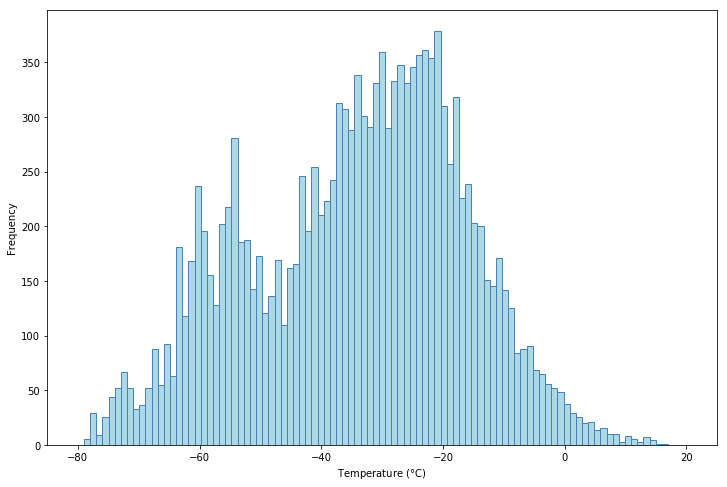

In [13]:
# Histograma da Temperatura
fig = plt.figure(1, figsize=(12, 8))
plt.ylabel('Frequency', fontsize='medium')
plt.xlabel('$\mathrm{Temperature\\ (\degree C)}$', fontsize='medium')
tbins=np.linspace(-80,20,num=100)
[n, b, p] = plt.hist(celsius, bins=tbins, normed=False, alpha=1, histtype='bar', color='lightblue', 
                     edgecolor='steelblue')

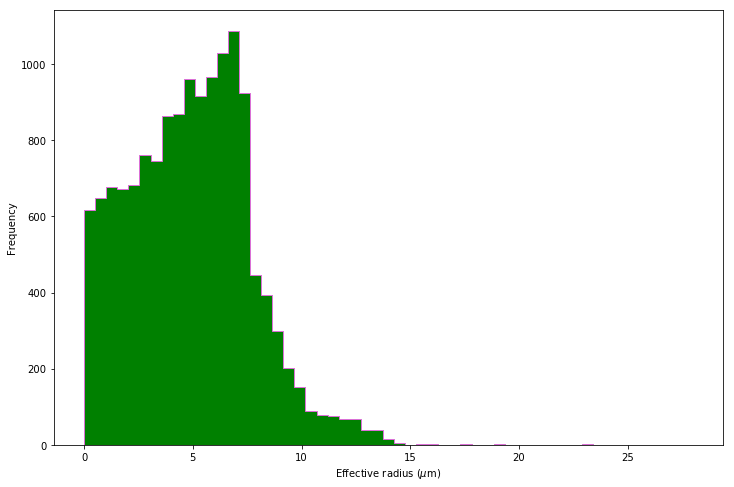

In [14]:
#Histograma Raio Efetivo
fig = plt.figure(1,figsize=(12,8))
plt.ylabel('Frequency', fontsize='medium')
plt.xlabel('Effective radius ($\\mu$m)', fontsize='medium')
reffbins=np.linspace(0,28,num=56)
[reffn, reffb, reffp] = plt.hist(reff_v, bins=reffbins, normed=False, alpha=1, histtype='stepfilled', color='green', 
                     edgecolor='orchid' )

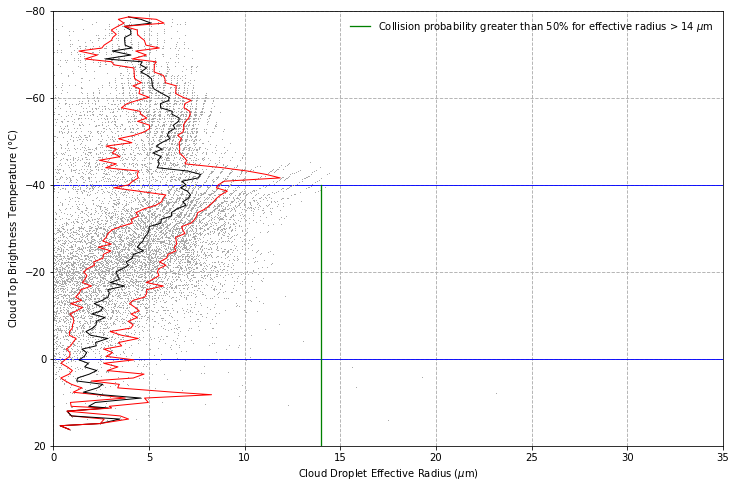

In [15]:
# Temperature x Reff geral
fig = plt.figure(1, figsize=(12,8))
ax = plt.subplot(1, 1, 1)
# Nomes nos eixos
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Cloud Droplet Effective Radius ($\\mu$m)', fontsize='medium')
#Limites nos eixos
plt.xlim([0.0, 35])  
#plt.ylim([20,-80])
plt.ylim([20,-80])
#Colocando grade
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)

#Inserindo linhas de auxilio
# Limite entre nuvens frias e mistas
plt.plot((0, 35), (-40, -40), 'b-', linewidth=0.9, label='')
# Limite entre nuvens mistas e quentes
plt.plot((0, 35), (0, 0), 'b-', linewidth=0.9, label='')
# Limite para que as chances de colisões e coalscência exceda 50%
#plt.plot((14.2, 14.2), (20, -80), 'g-', linewidth=0.92)
plt.plot((14.0, 14.0), (20, -40), 'green', linewidth=1.3, label='Collision probability greater than 50% for effective radius > 14 $\\mu$m')
plt.legend(loc='best', frameon=False)

# Plotando os dados
plt.plot(reff_v, celsius, color='0.662', linestyle='None', markersize=0.7, marker='+')
plt.hold = True
p25=np.zeros(1)-9999
p50=np.zeros(1)-9999
p75=np.zeros(1)-9999
tmp=np.zeros(1)-9999
init=True
#nzlims = [20, -80.0] # inverted temperature limits
nzlims = [20, -80.0] # inverted temperature limits
nzmax = max(nzlims)
nzmin = min(nzlims)
nzbins = 125
zbins = np.linspace(start = nzmin, stop = nzmax, num = nzbins)            
for bid in range(0, nzbins):
    if bid == (nzbins-1):
        dataid = (celsius>=zbins[bid])
    else:
        dataid = (celsius>=zbins[bid]) & (celsius<zbins[bid+1])
    if np.any(dataid):
        reffdata=reff_v[dataid]
        tempdata=celsius[dataid]
        if (init) :
            p25=np.array(np.percentile(reffdata,25))
            p50=np.array(np.percentile(reffdata,50))
            p75=np.array(np.percentile(reffdata,75))
            tmp=np.array(np.average(tempdata))
            init = False
        else:
            p25=np.append(p25,np.percentile(reffdata,25))
            p50=np.append(p50,np.percentile(reffdata,50))
            p75=np.append(p75,np.percentile(reffdata,75))
            tmp=np.append(tmp,np.average(tempdata)) 
if len(p25)>1:
                plt.plot(p25,tmp, color='red', linewidth=1)
#                plt.plot(p25,tmp, color='blue', label='Percentile 25', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                plt.plot(p50,tmp, color='black', linewidth=1)
#                plt.plot(p50,tmp, color='black',label='Percentile 50 - Median', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                plt.plot(p75,tmp, color='red', linewidth=1)
#                plt.plot(p75,tmp, color='red', label='Percentile 75', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                #plt.ylim(20,-80)
                #plt.xlim(0,40)
                plt.draw()

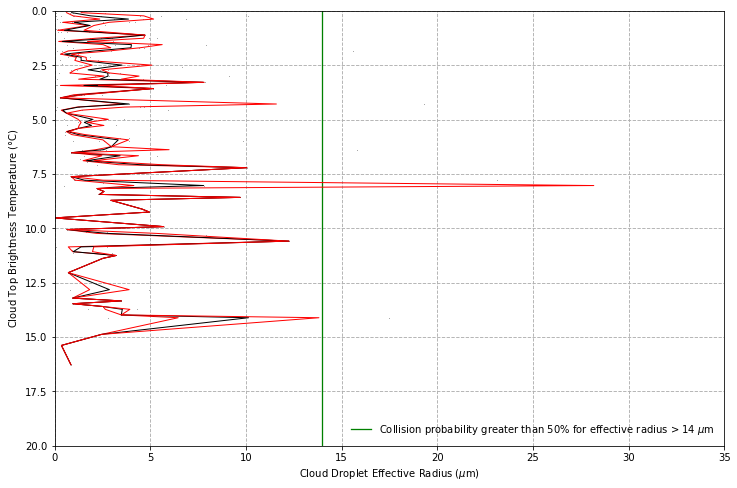

In [16]:
# Temperature x Reff nuvens quentes
fig = plt.figure(1, figsize=(12,8))
ax = plt.subplot(1, 1, 1)
# Nomes nos eixos
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Cloud Droplet Effective Radius ($\\mu$m)', fontsize='medium')
#Limites nos eixos
plt.xlim([0.0, 35])  
#plt.ylim([20,-80])
plt.ylim([20,0])
#Colocando grade
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)

#Inserindo linhas de auxilio
# Limite para que as chances de colisões e coalscência exceda 50%
#plt.plot((14.2, 14.2), (20, -80), 'g-', linewidth=0.92)
plt.plot((14.0, 14.0), (20, -40), 'green', linewidth=1.3, label='Collision probability greater than 50% for effective radius > 14 $\\mu$m')
plt.legend(loc='best', frameon=False)

# Plotando os dados
plt.plot(reff_v, celsius, color='0.662', linestyle='None', markersize=0.7, marker='+')
plt.hold = True
p25=np.zeros(1)-9999
p50=np.zeros(1)-9999
p75=np.zeros(1)-9999
tmp=np.zeros(1)-9999
init=True
#nzlims = [20, -80.0] # inverted temperature limits
nzlims = [20, 0] # inverted temperature limits
nzmax = max(nzlims)
nzmin = min(nzlims)
nzbins = 125
zbins = np.linspace(start = nzmin, stop = nzmax, num = nzbins)            
for bid in range(0, nzbins):
    if bid == (nzbins-1):
        dataid = (celsius>=zbins[bid])
    else:
        dataid = (celsius>=zbins[bid]) & (celsius<zbins[bid+1])
    if np.any(dataid):
        reffdata=reff_v[dataid]
        tempdata=celsius[dataid]
        if (init) :
            p25=np.array(np.percentile(reffdata,25))
            p50=np.array(np.percentile(reffdata,50))
            p75=np.array(np.percentile(reffdata,75))
            tmp=np.array(np.average(tempdata))
            init = False
        else:
            p25=np.append(p25,np.percentile(reffdata,25))
            p50=np.append(p50,np.percentile(reffdata,50))
            p75=np.append(p75,np.percentile(reffdata,75))
            tmp=np.append(tmp,np.average(tempdata)) 
if len(p25)>1:
                plt.plot(p25,tmp, color='red', linewidth=1)
#                plt.plot(p25,tmp, color='blue', label='Percentile 25', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                plt.plot(p50,tmp, color='black', linewidth=1)
#                plt.plot(p50,tmp, color='black',label='Percentile 50 - Median', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                plt.plot(p75,tmp, color='red', linewidth=1)
#                plt.plot(p75,tmp, color='red', label='Percentile 75', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                #plt.ylim(20,-80)
                #plt.xlim(0,40)
                plt.draw()

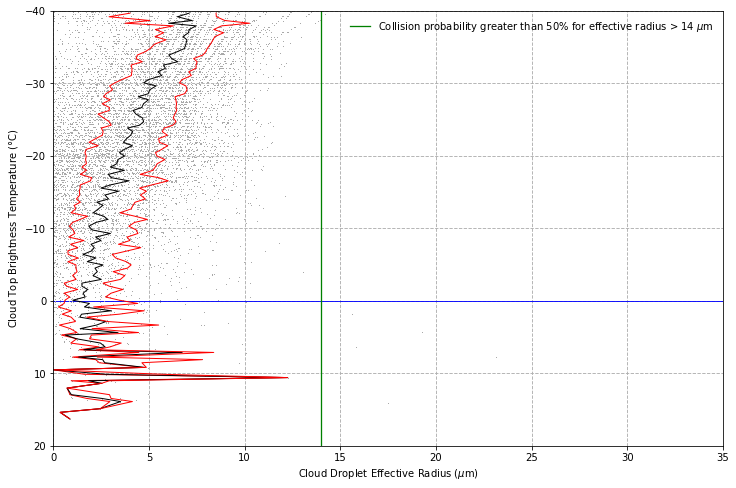

In [17]:
# Temperature x Reff para nuvens quentes e mistas
fig = plt.figure(1, figsize=(12,8))
ax = plt.subplot(1, 1, 1)
# Nomes nos eixos
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Cloud Droplet Effective Radius ($\\mu$m)', fontsize='medium')
#Limites nos eixos
plt.xlim([0.0, 35])  
#plt.ylim([20,-80])
plt.ylim([20,-40])
#Colocando grade
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)

#Inserindo linhas de auxilio
# Limite entre nuvens mistas e quentes
plt.plot((0, 35), (0, 0), 'b-', linewidth=0.9, label='')
# Limite para que as chances de colisões e coalscência exceda 50%
#plt.plot((14.2, 14.2), (20, -80), 'g-', linewidth=0.92)
plt.plot((14.0, 14.0), (20, -40), 'g-', linewidth=1.3, label='Collision probability greater than 50% for effective radius > 14 $\\mu$m')
plt.legend(loc='best', frameon=False)

# Plotando os dados
plt.plot(reff_v, celsius, color='0.662', linestyle='None', markersize=0.7, marker='+')
plt.hold = True
p25=np.zeros(1)-9999
p50=np.zeros(1)-9999
p75=np.zeros(1)-9999
tmp=np.zeros(1)-9999
init=True
#nzlims = [20, -80.0] # inverted temperature limits
nzlims = [20, -40.0] # inverted temperature limits
nzmax = max(nzlims)
nzmin = min(nzlims)
nzbins = 125
zbins = np.linspace(start = nzmin, stop = nzmax, num = nzbins)            
for bid in range(0, nzbins):
    if bid == (nzbins-1):
        dataid = (celsius>=zbins[bid])
    else:
        dataid = (celsius>=zbins[bid]) & (celsius<zbins[bid+1])
    if np.any(dataid):
        reffdata=reff_v[dataid]
        tempdata=celsius[dataid]
        if (init) :
            p25=np.array(np.percentile(reffdata,25))
            p50=np.array(np.percentile(reffdata,50))
            p75=np.array(np.percentile(reffdata,75))
            tmp=np.array(np.average(tempdata))
            init = False
        else:
            p25=np.append(p25,np.percentile(reffdata,25))
            p50=np.append(p50,np.percentile(reffdata,50))
            p75=np.append(p75,np.percentile(reffdata,75))
            tmp=np.append(tmp,np.average(tempdata)) 
if len(p25)>1:
                plt.plot(p25,tmp, color='red', linewidth=1)
#                plt.plot(p25,tmp, color='blue', label='Percentile 25', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                plt.plot(p50,tmp, color='black', linewidth=1)
#                plt.plot(p50,tmp, color='black',label='Percentile 50 - Median', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                plt.plot(p75,tmp, color='red', linewidth=1)
#                plt.plot(p75,tmp, color='red', label='Percentile 75', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                #plt.ylim(20,-80)
                #plt.xlim(0,40)
                plt.draw()

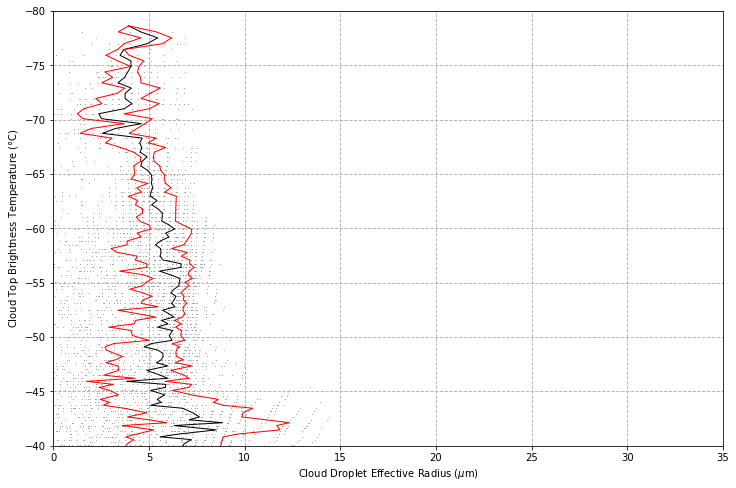

In [18]:
# Temperature x Reff para nuvens glaciadas
fig = plt.figure(1, figsize=(12,8))
ax = plt.subplot(1, 1, 1)
# Nomes nos eixos
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Cloud Droplet Effective Radius ($\\mu$m)', fontsize='medium')
#Limites nos eixos
plt.xlim([0.0, 35])  
#plt.ylim([20,-80])
plt.ylim([-40,-80])
#Colocando grade
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)

# Plotando os dados
plt.plot(reff_v, celsius, color='0.662', linestyle='None', markersize=0.7, marker='+')
plt.hold = True
p25=np.zeros(1)-9999
p50=np.zeros(1)-9999
p75=np.zeros(1)-9999
tmp=np.zeros(1)-9999
init=True
#nzlims = [20, -80.0] # inverted temperature limits
nzlims = [-40, -80.0] # inverted temperature limits
nzmax = max(nzlims)
nzmin = min(nzlims)
nzbins = 125
zbins = np.linspace(start = nzmin, stop = nzmax, num = nzbins)            
for bid in range(0, nzbins):
    if bid == (nzbins-1):
        dataid = (celsius>=zbins[bid])
    else:
        dataid = (celsius>=zbins[bid]) & (celsius<zbins[bid+1])
    if np.any(dataid):
        reffdata=reff_v[dataid]
        tempdata=celsius[dataid]
        if (init) :
            p25=np.array(np.percentile(reffdata,25))
            p50=np.array(np.percentile(reffdata,50))
            p75=np.array(np.percentile(reffdata,75))
            tmp=np.array(np.average(tempdata))
            init = False
        else:
            p25=np.append(p25,np.percentile(reffdata,25))
            p50=np.append(p50,np.percentile(reffdata,50))
            p75=np.append(p75,np.percentile(reffdata,75))
            tmp=np.append(tmp,np.average(tempdata)) 
if len(p25)>1:
                plt.plot(p25,tmp, color='red', linewidth=1)
#                plt.plot(p25,tmp, color='blue', label='Percentile 25', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                plt.plot(p50,tmp, color='black', linewidth=1)
#                plt.plot(p50,tmp, color='black',label='Percentile 50 - Median', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                plt.plot(p75,tmp, color='red', linewidth=1)
#                plt.plot(p75,tmp, color='red', label='Percentile 75', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                #plt.ylim(20,-80)
                #plt.xlim(0,40)
                plt.draw()

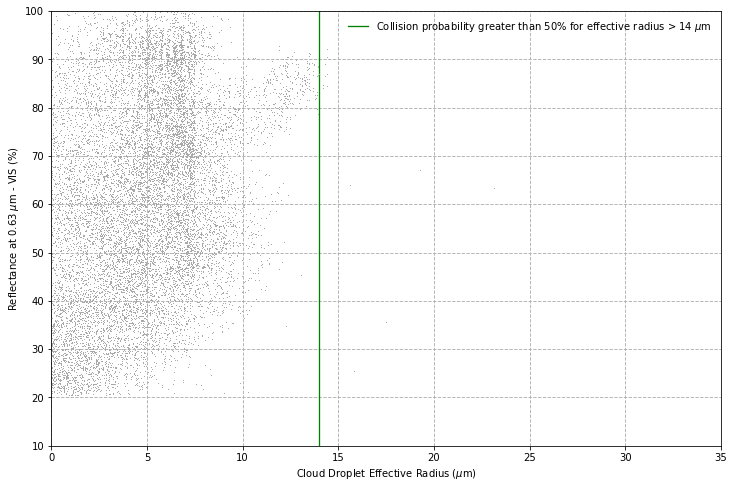

In [19]:
# VIS (r063) x Reff geral
fig = plt.figure(1, figsize=(12,8))
ax = plt.subplot(1, 1, 1)
# Nomes nos eixos
plt.ylabel('Reflectance at 0.63 $\\mu$m - VIS (%)', fontsize='medium')
plt.xlabel('Cloud Droplet Effective Radius ($\\mu$m)', fontsize='medium')
#Limites nos eixos
plt.xlim([0.0, 35])  
#plt.ylim([20,-80])
plt.ylim([10,100])
#Colocando grade
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)

#Inserindo linhas de auxilio
# Limite para que as chances de colisões e coalscência exceda 50%
#plt.plot((14.2, 14.2), (20, -80), 'g-', linewidth=0.92)
plt.plot((14.0, 14.0), (0, 100), 'green', linewidth=1.3, label='Collision probability greater than 50% for effective radius > 14 $\\mu$m')
plt.legend(loc='best', frameon=False)

# Plotando os dados
plt.plot(reff_v, r063, color='0.662', linestyle='None', markersize=0.7, marker='+')

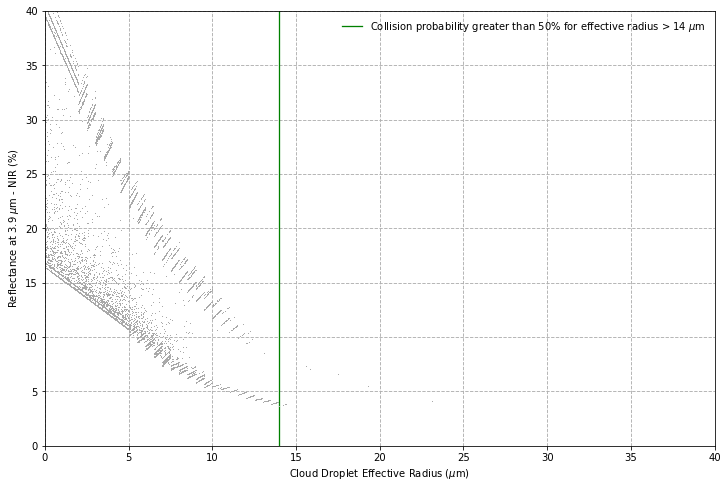

In [20]:
# NIR (r390) x Reff geral
fig = plt.figure(1, figsize=(12,8))
ax = plt.subplot(1, 1, 1)
# Nomes nos eixos
plt.ylabel('Reflectance at 3.9 $\\mu$m - NIR (%)', fontsize='medium')
plt.xlabel('Cloud Droplet Effective Radius ($\\mu$m)', fontsize='medium')
#Limites nos eixos
plt.xlim([0.0, 40])  
#plt.ylim([20,-80])
plt.ylim([0,40])
#Colocando grade
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)

#Inserindo linhas de auxilio
# Limite para que as chances de colisões e coalscência exceda 50%
#plt.plot((14.2, 14.2), (20, -80), 'g-', linewidth=0.92)
plt.plot((14.0, 14.0), (0, 100), 'green', linewidth=1.3, label='Collision probability greater than 50% for effective radius > 14 $\\mu$m')
plt.legend(loc='best', frameon=False)

# Plotando os dados
plt.plot(reff_v, r390, color='0.662', linestyle='None', markersize=0.7, marker='+')

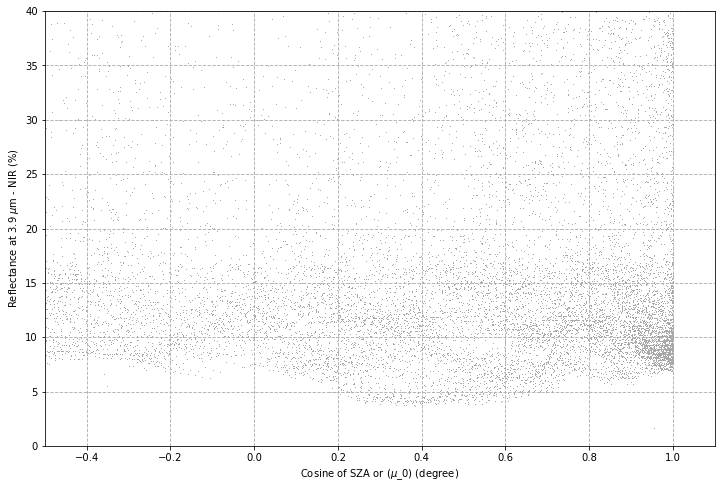

In [21]:
# NIR (r390) x cos(SZA)=mu0
fig = plt.figure(1, figsize=(12,8))
ax = plt.subplot(1, 1, 1)
# Nomes nos eixos
plt.ylabel('Reflectance at 3.9 $\\mu$m - NIR (%)', fontsize='medium')
plt.xlabel('Cosine of SZA or ($\\mu$_0) (degree)', fontsize='medium')
#Limites nos eixos
plt.xlim([-0.5, 1.1])  
#plt.ylim([20,-80])
plt.ylim([0,40])
#Colocando grade
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)

# Plotando os dados
plt.plot(mu0, r390, color='0.662', linestyle='None', markersize=0.7, marker='+')

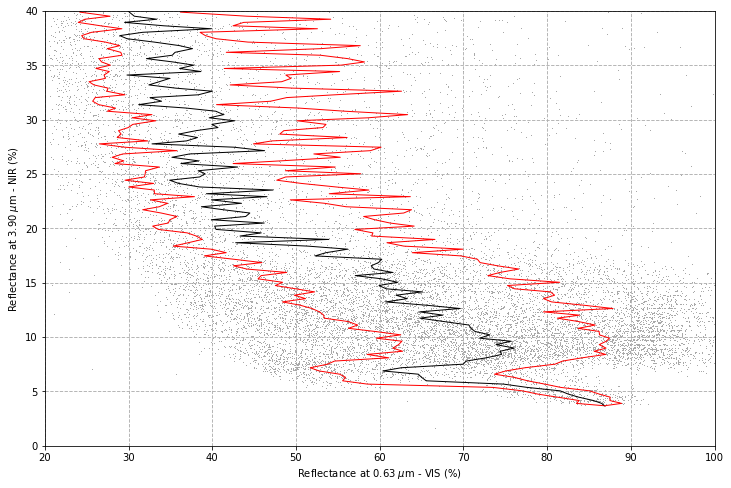

In [22]:
# Kaufman Nakajima: ref3.9 x ref0.63 
fig = plt.figure(1, figsize=(12,8))
ax = plt.subplot(1, 1, 1)
plt.ylabel('Reflectance at 3.90 $\\mu$m - NIR (%)', fontsize='medium')
plt.xlabel('Reflectance at 0.63 $\\mu$m - VIS (%)', fontsize='medium')
plt.xlim([20, 100])  
plt.ylim([0, 40])
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)
plt.plot(r063, r390, color='0.662', linestyle='None', markersize=0.7, marker='+')

plt.hold = True
p25=np.zeros(1)-9999
p50=np.zeros(1)-9999
p75=np.zeros(1)-9999
tmp=np.zeros(1)-9999
init=True
nzlims = [2.5, 40.0]
nzmax = max(nzlims)
nzmin = min(nzlims)
nzbins = 125
zbins = np.linspace(start = nzmin, stop = nzmax, num = nzbins)            
for bid in range(0, nzbins):
    if bid == (nzbins-1):
        dataid = (r390>=zbins[bid])
    else:
        dataid = (r390>=zbins[bid]) & (r390<zbins[bid+1])
    if np.any(dataid):
        VISdata=r063[dataid]
        NIRdata=r390[dataid]
        if (init) :
            p25=np.array(np.percentile(VISdata,25))
            p50=np.array(np.percentile(VISdata,50))
            p75=np.array(np.percentile(VISdata,75))
            tmp=np.array(np.average(NIRdata))
            init = False
        else:
            p25=np.append(p25,np.percentile(VISdata,25))
            p50=np.append(p50,np.percentile(VISdata,50))
            p75=np.append(p75,np.percentile(VISdata,75))
            tmp=np.append(tmp,np.average(NIRdata)) 
if len(p25)>1:
                plt.plot(p25,tmp, color='red', linewidth=1)
#                plt.plot(p25,tmp, color='blue', label='Percentile 25', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                plt.plot(p50,tmp, color='black', linewidth=1)
#                plt.plot(p50,tmp, color='black',label='Percentile 50 - Median', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                plt.plot(p75,tmp, color='red', linewidth=1)
#                plt.plot(p75,tmp, color='red', label='Percentile 75', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                #plt.ylim(20,-80)
                #plt.xlim(0,40)
                plt.draw()

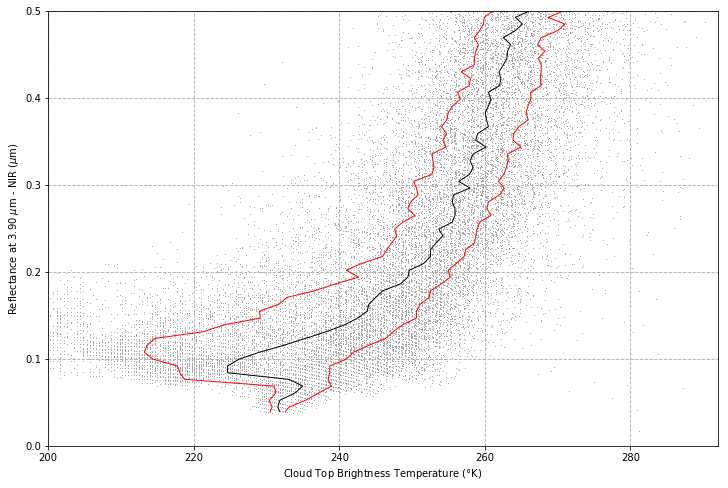

In [23]:
# Temperature x ref390
fig = plt.figure(1, figsize=(12,8))
ax = plt.subplot(1, 1, 1)
plt.xlabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree K)}$', fontsize='medium')
plt.ylabel('Reflectance at 3.90 $\\mu$m - NIR ($\\mu$m)', fontsize='medium')
plt.xlim([200, 292])  
plt.ylim([0.00,0.5])
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)
#plt.plot((0, 40), (-40, -40), 'g-', linewidth=0.92)
#plt.plot((14.2, 14.2), (20, -80), 'g-', linewidth=0.92)
#plt.plot(dados.temp, dados.ref390, color='0.5', linestyle='None', markersize=1.4, marker='.')
plt.plot(dados.temp, dados.ref390, color='0.662', linestyle='None', markersize=0.7, marker='+')

plt.hold = True
p25=np.zeros(1)-9999
p50=np.zeros(1)-9999
p75=np.zeros(1)-9999
tmp=np.zeros(1)-9999
init=True
nzlims = [0.025, 1.0]
nzmax = max(nzlims)
nzmin = min(nzlims)
nzbins = 125
zbins = np.linspace(start = nzmin, stop = nzmax, num = nzbins)            
for bid in range(0, nzbins):
    if bid == (nzbins-1):
        dataid = (dados.ref390>=zbins[bid])
    else:
        dataid = (dados.ref390>=zbins[bid]) & (dados.ref390<zbins[bid+1])
    if np.any(dataid):
        tempKdata=dados.temp[dataid]
        NIRdata=dados.ref390[dataid]
        if (init) :
            p25=np.array(np.percentile(tempKdata,25))
            p50=np.array(np.percentile(tempKdata,50))
            p75=np.array(np.percentile(tempKdata,75))
            tmp=np.array(np.average(NIRdata))
            init = False
        else:
            p25=np.append(p25,np.percentile(tempKdata,25))
            p50=np.append(p50,np.percentile(tempKdata,50))
            p75=np.append(p75,np.percentile(tempKdata,75))
            tmp=np.append(tmp,np.average(NIRdata)) 
if len(p25)>1:
                plt.plot(p25,tmp, color='red', linewidth=1)
#                plt.plot(p25,tmp, color='blue', label='Percentile 25', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                plt.plot(p50,tmp, color='black', linewidth=1)
#                plt.plot(p50,tmp, color='black',label='Percentile 50 - Median', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                plt.plot(p75,tmp, color='red', linewidth=1)
#                plt.plot(p75,tmp, color='red', label='Percentile 75', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                #plt.ylim(20,-80)
                #plt.xlim(0,40)
                plt.draw()

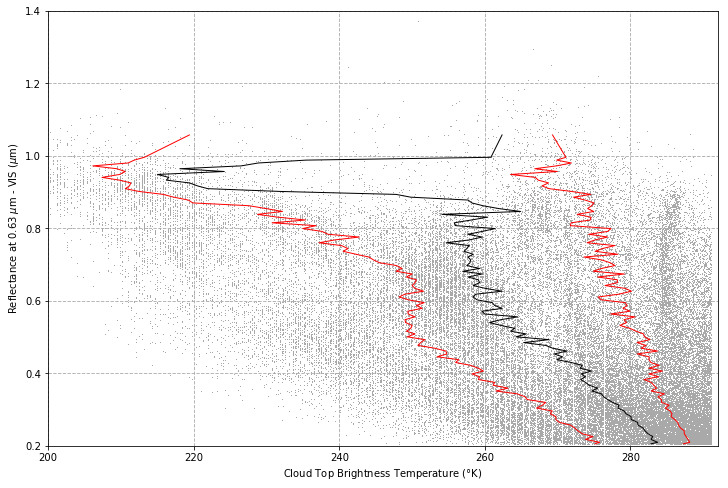

In [24]:
# Temperature x ref063
fig = plt.figure(1, figsize=(12,8))
ax = plt.subplot(1, 1, 1)
plt.xlabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree K)}$', fontsize='medium')
plt.ylabel('Reflectance at 0.63 $\\mu$m - VIS ($\\mu$m)', fontsize='medium')
plt.xlim([200, 292])  
plt.ylim([0.20,1.4])
plt.grid(b=True, axis='both', linestyle='--', linewidth=0.9)
#plt.plot((0, 40), (-40, -40), 'g-', linewidth=0.92)
#plt.plot((14.2, 14.2), (20, -80), 'g-', linewidth=0.92)
plt.plot(dados.temp, dados.ref063, color='0.662', linestyle='None', markersize=0.7, marker='+')

plt.hold = True
p25=np.zeros(1)-9999
p50=np.zeros(1)-9999
p75=np.zeros(1)-9999
tmp=np.zeros(1)-9999
init=True
nzlims = [0.025, 1]
nzmax = max(nzlims)
nzmin = min(nzlims)
nzbins = 125
zbins = np.linspace(start = nzmin, stop = nzmax, num = nzbins)            
for bid in range(0, nzbins):
    if bid == (nzbins-1):
        dataid = (dados.ref063>=zbins[bid])
    else:
        dataid = (dados.ref063>=zbins[bid]) & (dados.ref063<zbins[bid+1])
    if np.any(dataid):
        tempKdata=dados.temp[dataid]
        IRdata=dados.ref063[dataid]
        if (init) :
            p25=np.array(np.percentile(tempKdata,25))
            p50=np.array(np.percentile(tempKdata,50))
            p75=np.array(np.percentile(tempKdata,75))
            tmp=np.array(np.average(IRdata))
            init = False
        else:
            p25=np.append(p25,np.percentile(tempKdata,25))
            p50=np.append(p50,np.percentile(tempKdata,50))
            p75=np.append(p75,np.percentile(tempKdata,75))
            tmp=np.append(tmp,np.average(IRdata)) 
if len(p25)>1:
                plt.plot(p25,tmp, color='red', linewidth=1)
#                plt.plot(p25,tmp, color='blue', label='Percentile 25', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                plt.plot(p50,tmp, color='black', linewidth=1)
#                plt.plot(p50,tmp, color='black',label='Percentile 50 - Median', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                plt.plot(p75,tmp, color='red', linewidth=1)
#                plt.plot(p75,tmp, color='red', label='Percentile 75', linewidth=grl)
#                plt.legend(loc='best', frameon='False', fontsize='small')
                #plt.ylim(20,-80)
                #plt.xlim(0,40)
                plt.draw()

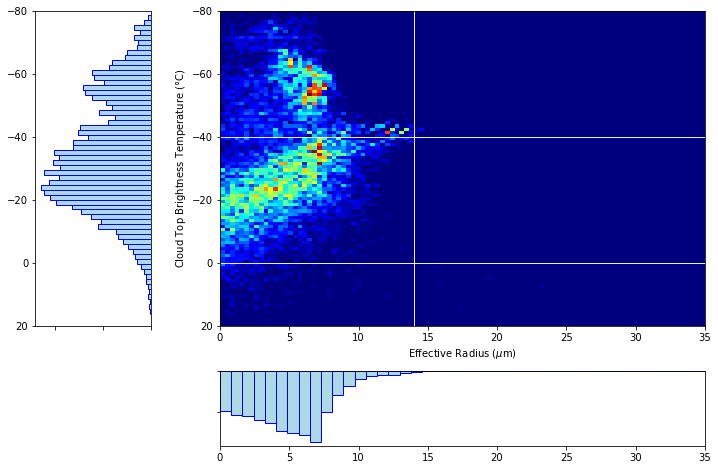

In [25]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(12, 8))
grid = plt.GridSpec(4, 4, hspace=0.6, wspace=0.6)
main_ax = fig.add_subplot(grid[:-1, 1:])
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Effective Radius ($\\mu$m)', fontsize='medium')
plt.grid(False)

y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax, xlim=(0,35))

# scatter points on the main axes
#main_ax.plot(reff_v, celsius, '.', markersize=1.5, color='0.5')
im = main_ax.hist2d(reff_v, celsius, bins=100, cmap='jet', range=((0, 35), (-80, 20)))
main_ax.plot((0, 40), (-40, -40), 'w-', linewidth=0.92)
main_ax.plot((14.0, 14.0), (20, -80), 'w-', linewidth=0.92)
main_ax.plot((0, 40), (0, 0), 'w-', linewidth=0.92)
#fig.colorbar(im, cax=main_ax, use_gridspec=True)



# histogram on the attached axes
x_hist.hist(reff_v, 60, histtype='bar', orientation='vertical', color='lightblue', edgecolor='blue')
x_hist.invert_yaxis()

y_hist.hist(celsius, 60, histtype='bar', orientation='horizontal', color='lightblue', edgecolor='blue')
y_hist.invert_yaxis()
y_hist.invert_xaxis()

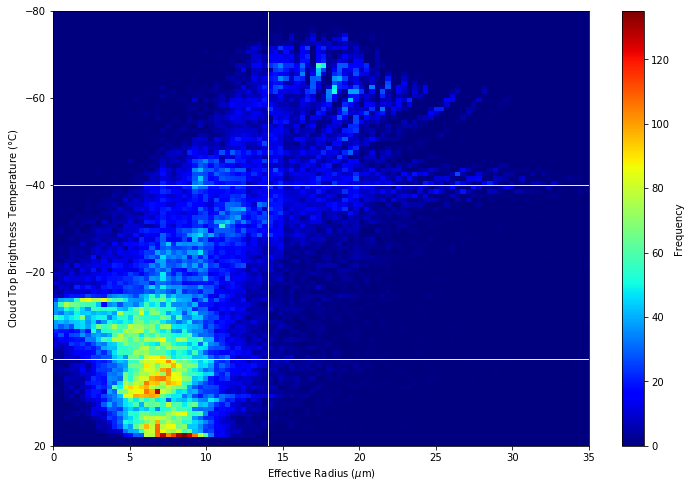

In [26]:
fig = plt.figure(figsize=(12, 8))
plt.hist2d(reff_v, celsius, bins=100, cmap='jet', range=((0, 35), (-80, 20)))
plt.gca().invert_yaxis()
cb = plt.colorbar()
plt.grid(False)
cb.set_label('Frequency')
plt.ylabel('$\mathrm{Cloud\ Top\ Brightness\ Temperature\\ (\degree C)}$', fontsize='medium')
plt.xlabel('Effective Radius ($\\mu$m)', fontsize='medium')
plt.plot((0, 40), (-40, -40), 'w-', linewidth=0.92)
plt.plot((14.0, 14.0), (20, -80), 'w-', linewidth=0.92)
plt.plot((0, 40), (0, 0), 'w-', linewidth=0.92)

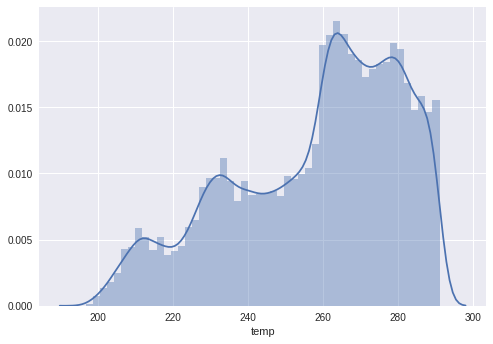

In [51]:
import seaborn as sns
sns.set()
sns.distplot(dados['temp'])

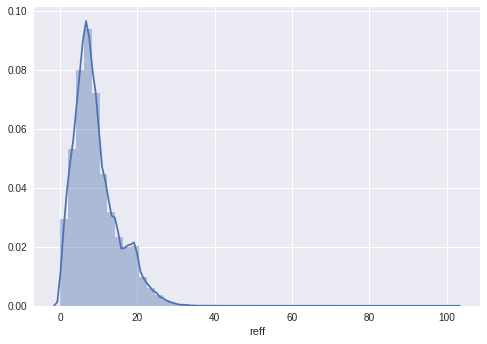

In [52]:
import seaborn as sns
sns.set()
sns.distplot(reff_v)